In [1]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    quote = Quote([b.symbol for b in Instrument.find_etfs(100)], 100)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-27 to 2019-06-07'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-mean'] > 0.8)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
SPLV,50,1.605716,1.148190,1.244321,1.971361
FINX,50,1.983492,2.492357,0.724813,5.312173
XLU,50,0.935085,1.711674,0.442891,3.426052
ICLN,50,1.263639,2.457692,0.442138,4.109590
VIG,50,1.118844,2.437347,0.386422,4.634193
ITA,50,1.276430,3.042686,0.361335,6.911841
VOOG,50,1.037793,3.066414,0.280716,6.391444
SPYG,50,1.029170,3.043674,0.279981,6.359873
XLF,50,1.204323,4.161100,0.246887,7.338794


In [6]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 1)

['SPLV'] -0.7514804135385182 0.0 0.49284013923112413 -1.2443205527696424


['SPLV']

In [7]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['SPLV', 'FINX'] 0.9142932484349184 1.0625429270037445 1.8208834475592637 -1.9691331261280898
['SPLV', 'ICLN'] 0.4836570643731981 0.6498781456505021 1.5202375592902166 -1.6864586405675206
['XLU', 'ICLN'] 0.3865099970979694 -0.6123714754284411 1.8839105175532063 -0.8850290450267958


['XLU', 'ICLN']

In [8]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, ['SPLV'])

['SPLV', 'FINX'] 0.9142932484349184 1.0625429270037445 1.8208834475592637 -1.9691331261280898
['SPLV', 'ICLN'] 0.4836570643731981 0.6498781456505021 1.5202375592902166 -1.6864586405675206


['SPLV', 'ICLN']

In [6]:
quote.setup_mask(['SPLV', 'ICLN'])
quote.find_optimal_ratio(21, 1)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 SPLV    0.927462
 ICLN    0.072538
 dtype: float64, 1.5809, 1.1354)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
SPLV,50.0,1.605716,1.148190,-0.950248,0.889543,1.733538,2.093110,4.955301,1.244321,1.971361
Portfolio,50.0,1.579435,1.134565,-0.966877,0.892208,1.692531,2.142835,4.832869,1.236099,1.942796
ICLN,50.0,1.263639,2.457692,-2.859960,-0.766495,1.367268,3.001491,6.210528,0.442138,4.109590


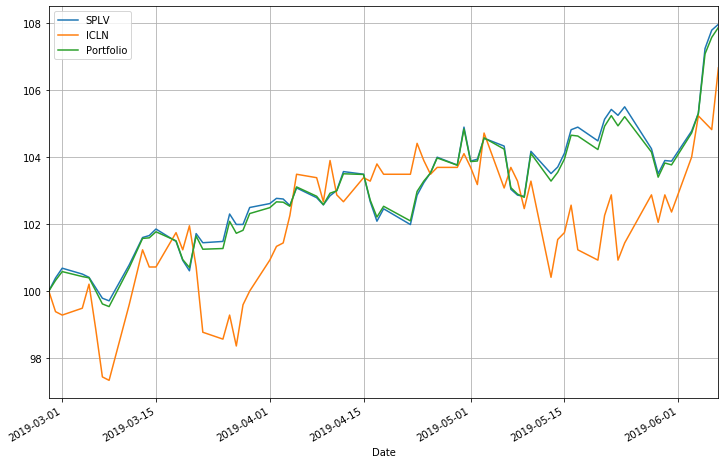

In [7]:
quote.graph(21, {'SPLV': 0.927462, 'ICLN': 0.072538})